[toc]

# ML 学习笔记-7-XGBoost-4-XGBoost类的实现

In [1]:
import ipynb_importer
from note7_xgboost_3 import XGBoostBaseLearner, MSE
import numpy as np
from matplotlib import pyplot as plt

importing Jupyter notebook from note7_xgboost_3.ipynb


In [2]:
class XGBoost:
    def __init__(self, regression=True, n_estimator=3, **params):
        self.n_estimator = n_estimator
        self.regression = regression
        self.loss = MSE() if regression else CrossEntropyWithLogits()
        self.trees = [
            XGBoostBaseLearner(loss=self.loss, **params) for _ in range(self.n_estimator)
        ]
        
    def fit(self, X, y):
        yhat = np.zeros_like(y)
        for tree in self.trees:
            tree.fit(X, y, yhat)
            yhat += tree.predict(X)
        return self
    
    def predict(self, X):
        n_samples = X.shape[0]
        yhat = np.zeros((n_samples,))
        for tree in self.trees:
            yhat += tree.predict(X)
        return yhat

mse: 0.0007601379269091327


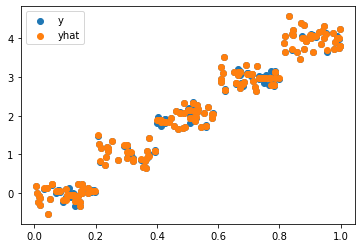

In [3]:
if __name__ == "__main__":
    with open("ex0.txt") as f:
        data = np.array([list(map(float, line.strip().split())) for line in f])
        X = data[:, 0][:, np.newaxis]
        y = data[:, 1]

    bst = XGBoost()
    bst.fit(X, y)

    yhat = bst.predict(X)
    print(f"mse: {MSE()(y, yhat)}")
    plt.scatter(X, y, label='y')
    plt.scatter(X, yhat, label='yhat')
    plt.legend()
    plt.show()